<a href="https://colab.research.google.com/github/JuanDavidV8/Agro_project/blob/main/Entrega_proyecto_final_JuanValencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Abstract

Este proyecto se centra en el análisis de la accidentalidad en Colombia durante el período comprendido entre los años 2012 y 2022. En esta investigación, se abordan diversas variables tanto cualitativas como cuantitativas, tales como la incidencia de accidentes según el medio de transporte, la fecha, la hora y la gravedad de los incidentes. El objetivo principal de este proyecto es identificar los actores viales que presentan una mayor frecuencia de accidentes tanto en el presente como proyectando hacia el futuro. A partir de estos hallazgos, se pretende implementar medidas preventivas con el fin de mitigar la accidentalidad en las vías.

El análisis exhaustivo y las decisiones resultantes para reducir la accidentalidad desempeñarán un papel fundamental en proporcionar a la población información sustancial. Esto contribuirá a elevar la conciencia general y fomentar una mayor precaución al transitar por las carreteras del país. Los resultados obtenidos permitirán a los ciudadanos comprender el impacto tanto positivo como negativo que puede acarrear un accidente de tránsito, impulsando así una cultura de seguridad vial más sólida y consciente.

**Contexto empresarial:** Entendemos que la accidentalidad representa un desafío significativo a nivel público en varios países, y algunas naciones han logrado mitigar considerablemente este problema mediante intervenciones culturales. Sin embargo, en América Latina, la incidencia de este fenómeno persiste de manera marcada. Por consiguiente, este estudio tiene como objetivo desarrollar un proyecto piloto orientado a la implementación de iniciativas concretas para reducir las cifras de accidentalidad en Colombia.

**Contexto análitico:** Tenemos un data set obtenido de los datos públicos de Colombia obtenidos mediante API por medio de la URL https://www.datos.gov.co/resource/7cci-nqqb.json.

El data set cuenta con variables de interés que incluyen información sobre la fecha, clasificación del tipo de accidente y su segmentación según el actor vial involucrado. Además, se registra el día correspondiente y se proporciona información adicional sobre la gravedad del accidente.

Las preguntas a responder son las siguientes:

* ¿En qué medida se clasifican los accidentes según la magnitud de los daños, lesiones o impacto en la seguridad vial?

* ¿Cuál es la distribución de la variable día y en cuál día se presenta más accidentalidad?

* ¿Cuál es el día de mayor accidentalidad según el actor víal?

* ¿Cuál es la gravedad de los accidentes según el actor víal?

* ¿Cuál es la gravedad de los accidentes según el actor víal y la fecha?

* ¿Cuál es el actor víal que presenta mayor accidentalidad?

* ¿Cuál es la corrrelación entre las variables?

## Carga del data set desde la API

In [ ]:
import requests
import json

In [ ]:
url = "https://www.datos.gov.co/resource/7cci-nqqb.json"

In [ ]:
response = requests.get(url)

In [ ]:
response

<Response [200]>

In [ ]:
response.text

'[{"orden":"1","fecha":"01/01/2012","a_o":"2012","mes":"01. Enero","d_a":"07. Domingo","gravedad":"Con Heridos","peaton":"0","automovil":"1","campaero":"0","camioneta":"0","micro":"0","buseta":"0","bus":"0","camion":"0","volqueta":"0","moto":"0","bicicleta":"0","otro":"0","via_1":"CALLE","barrio":"Mutis","hora":"12:15:00 p.\xa0m.","entidad":"AGENTES DTB","nombrecomuna":"17. MUTIS","propietario_de_veh_culo":"Particular","diurnio_nocturno":"Diurno","hora_restriccion_moto":"No aplica"}\n,{"orden":"2","fecha":"01/01/2012","a_o":"2012","mes":"01. Enero","d_a":"07. Domingo","gravedad":"Solo Daños","peaton":"0","automovil":"1","campaero":"0","camioneta":"1","micro":"0","buseta":"0","bus":"0","camion":"0","volqueta":"0","moto":"0","bicicleta":"0","otro":"0","via_1":"VIA MATANZA","barrio":"Regaderos Norte","hora":"02:00:00 p.\xa0m.","entidad":"AGENTES DTB","nombrecomuna":"02. NORORIENTAL","propietario_de_veh_culo":"Empresa","diurnio_nocturno":"Diurno","hora_restriccion_moto":"No aplica"}\n,{"or

In [ ]:
datos = json.loads(response.text)

In [ ]:
datos

[{'orden': '1',
  'fecha': '01/01/2012',
  'a_o': '2012',
  'mes': '01. Enero',
  'd_a': '07. Domingo',
  'gravedad': 'Con Heridos',
  'peaton': '0',
  'automovil': '1',
  'campaero': '0',
  'camioneta': '0',
  'micro': '0',
  'buseta': '0',
  'bus': '0',
  'camion': '0',
  'volqueta': '0',
  'moto': '0',
  'bicicleta': '0',
  'otro': '0',
  'via_1': 'CALLE',
  'barrio': 'Mutis',
  'hora': '12:15:00 p.\xa0m.',
  'entidad': 'AGENTES DTB',
  'nombrecomuna': '17. MUTIS',
  'propietario_de_veh_culo': 'Particular',
  'diurnio_nocturno': 'Diurno',
  'hora_restriccion_moto': 'No aplica'},
 {'orden': '2',
  'fecha': '01/01/2012',
  'a_o': '2012',
  'mes': '01. Enero',
  'd_a': '07. Domingo',
  'gravedad': 'Solo Daños',
  'peaton': '0',
  'automovil': '1',
  'campaero': '0',
  'camioneta': '1',
  'micro': '0',
  'buseta': '0',
  'bus': '0',
  'camion': '0',
  'volqueta': '0',
  'moto': '0',
  'bicicleta': '0',
  'otro': '0',
  'via_1': 'VIA MATANZA',
  'barrio': 'Regaderos Norte',
  'hora': '02

In [ ]:
df= pd.DataFrame(datos)

In [ ]:
df.head()

,orden,fecha,a_o,mes,d_a,gravedad,peaton,automovil,campaero,camioneta,...,bicicleta,otro,via_1,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno,hora_restriccion_moto
0,1,01/01/2012,2012,01. Enero,07. Domingo,Con Heridos,0,1,0,0,...,0,0,CALLE,Mutis,12:15:00 p. m.,AGENTES DTB,17. MUTIS,Particular,Diurno,No aplica
1,2,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,...,0,0,VIA MATANZA,Regaderos Norte,02:00:00 p. m.,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,No aplica
2,3,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,0,0,1,...,0,0,CARRERA,Cabecera del Llano,12:00:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica
3,4,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,...,0,0,CARRERA,Norte Bajo,06:30:00 p. m.,AGENTES DTB,03. SAN FRANCISCO,Particular,Nocturno,No aplica
4,5,01/01/2012,2012,01. Enero,07. Domingo,Con Heridos,1,0,0,0,...,0,0,CARRERA,Dangond,12:30:00 a. m.,AGENTES DTB,11. SUR,Particular,Nocturno,En restricción


# EDA

In [ ]:
df.shape

(1000, 26)

In [ ]:
df.columns

Index(['orden', 'fecha', 'a_o', 'mes', 'd_a', 'gravedad', 'peaton',
       'automovil', 'campaero', 'camioneta', 'micro', 'buseta', 'bus',
       'camion', 'volqueta', 'moto', 'bicicleta', 'otro', 'via_1', 'barrio',
       'hora', 'entidad', 'nombrecomuna', 'propietario_de_veh_culo',
       'diurnio_nocturno', 'hora_restriccion_moto'],
      dtype='object')

In [ ]:
df.describe()

,orden,fecha,a_o,mes,d_a,gravedad,peaton,automovil,campaero,camioneta,...,bicicleta,otro,via_1,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno,hora_restriccion_moto
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,85,1,3,7,3,3,4,3,3,...,2,3,26,116,269,1,21,2,2,3
top,1,17/02/2012,2012,02. Febrero,06. Sabado,Solo Daños,0,1,0,0,...,0,0,CARRERA,Centro,04:30:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Empresa,Diurno,No aplica
freq,1,22,1000,376,164,596,908,471,942,846,...,988,975,378,102,19,1000,158,514,688,527


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    1000 non-null   object
 1   fecha                    1000 non-null   object
 2   a_o                      1000 non-null   object
 3   mes                      1000 non-null   object
 4   d_a                      1000 non-null   object
 5   gravedad                 1000 non-null   object
 6   peaton                   1000 non-null   object
 7   automovil                1000 non-null   object
 8   campaero                 1000 non-null   object
 9   camioneta                1000 non-null   object
 10  micro                    1000 non-null   object
 11  buseta                   1000 non-null   object
 12  bus                      1000 non-null   object
 13  camion                   1000 non-null   object
 14  volqueta                 1000 non-null   

#Limpieza del data set

In [ ]:
df['fecha']= pd.to_datetime(df['fecha'])

<ipython-input-15-8fffaecd8ea7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['fecha']= pd.to_datetime(df['fecha'])


In [ ]:
df['peaton'] = df['peaton'].astype(int)

In [ ]:
df['automovil'] = df['automovil'].astype(int)

In [ ]:
df['Campaero '] = df['campaero'].astype(int)

In [ ]:
df['camioneta'] = df['camioneta'].astype(int)

In [ ]:
df['micro'] = df['micro'].astype(int)

In [ ]:
df['buseta'] = df['buseta'].astype(int)

In [ ]:
df['bus'] = df['bus'].astype(int)

In [ ]:
df['camion'] = df['camion'].astype(int)

In [ ]:
df['volqueta'] = df['volqueta'].astype(int)

In [ ]:
df['moto'] = df['moto'].astype(int)

In [ ]:
df['bicicleta'] = df['bicicleta'].astype(int)

In [ ]:
df['otro'] = df['otro'].astype(int)

In [ ]:
df['a_o'] = df['a_o'].astype(int)

In [ ]:
df = df.drop(['Campaero '],axis=1)

In [ ]:
df = df.drop(['campaero'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   orden                    1000 non-null   object        
 1   fecha                    1000 non-null   datetime64[ns]
 2   a_o                      1000 non-null   int64         
 3   mes                      1000 non-null   object        
 4   d_a                      1000 non-null   object        
 5   gravedad                 1000 non-null   object        
 6   peaton                   1000 non-null   int64         
 7   automovil                1000 non-null   int64         
 8   camioneta                1000 non-null   int64         
 9   micro                    1000 non-null   int64         
 10  buseta                   1000 non-null   int64         
 11  bus                      1000 non-null   int64         
 12  camion                   1000 non-n

In [ ]:
df.head()

,orden,fecha,a_o,mes,d_a,gravedad,peaton,automovil,camioneta,micro,...,bicicleta,otro,via_1,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno,hora_restriccion_moto
0,1,2012-01-01,2012,01. Enero,07. Domingo,Con Heridos,0,1,0,0,...,0,0,CALLE,Mutis,12:15:00 p. m.,AGENTES DTB,17. MUTIS,Particular,Diurno,No aplica
1,2,2012-01-01,2012,01. Enero,07. Domingo,Solo Daños,0,1,1,0,...,0,0,VIA MATANZA,Regaderos Norte,02:00:00 p. m.,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,No aplica
2,3,2012-01-01,2012,01. Enero,07. Domingo,Solo Daños,0,0,1,0,...,0,0,CARRERA,Cabecera del Llano,12:00:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica
3,4,2012-01-01,2012,01. Enero,07. Domingo,Solo Daños,0,1,1,0,...,0,0,CARRERA,Norte Bajo,06:30:00 p. m.,AGENTES DTB,03. SAN FRANCISCO,Particular,Nocturno,No aplica
4,5,2012-01-01,2012,01. Enero,07. Domingo,Con Heridos,1,0,0,0,...,0,0,CARRERA,Dangond,12:30:00 a. m.,AGENTES DTB,11. SUR,Particular,Nocturno,En restricción


<Axes: >

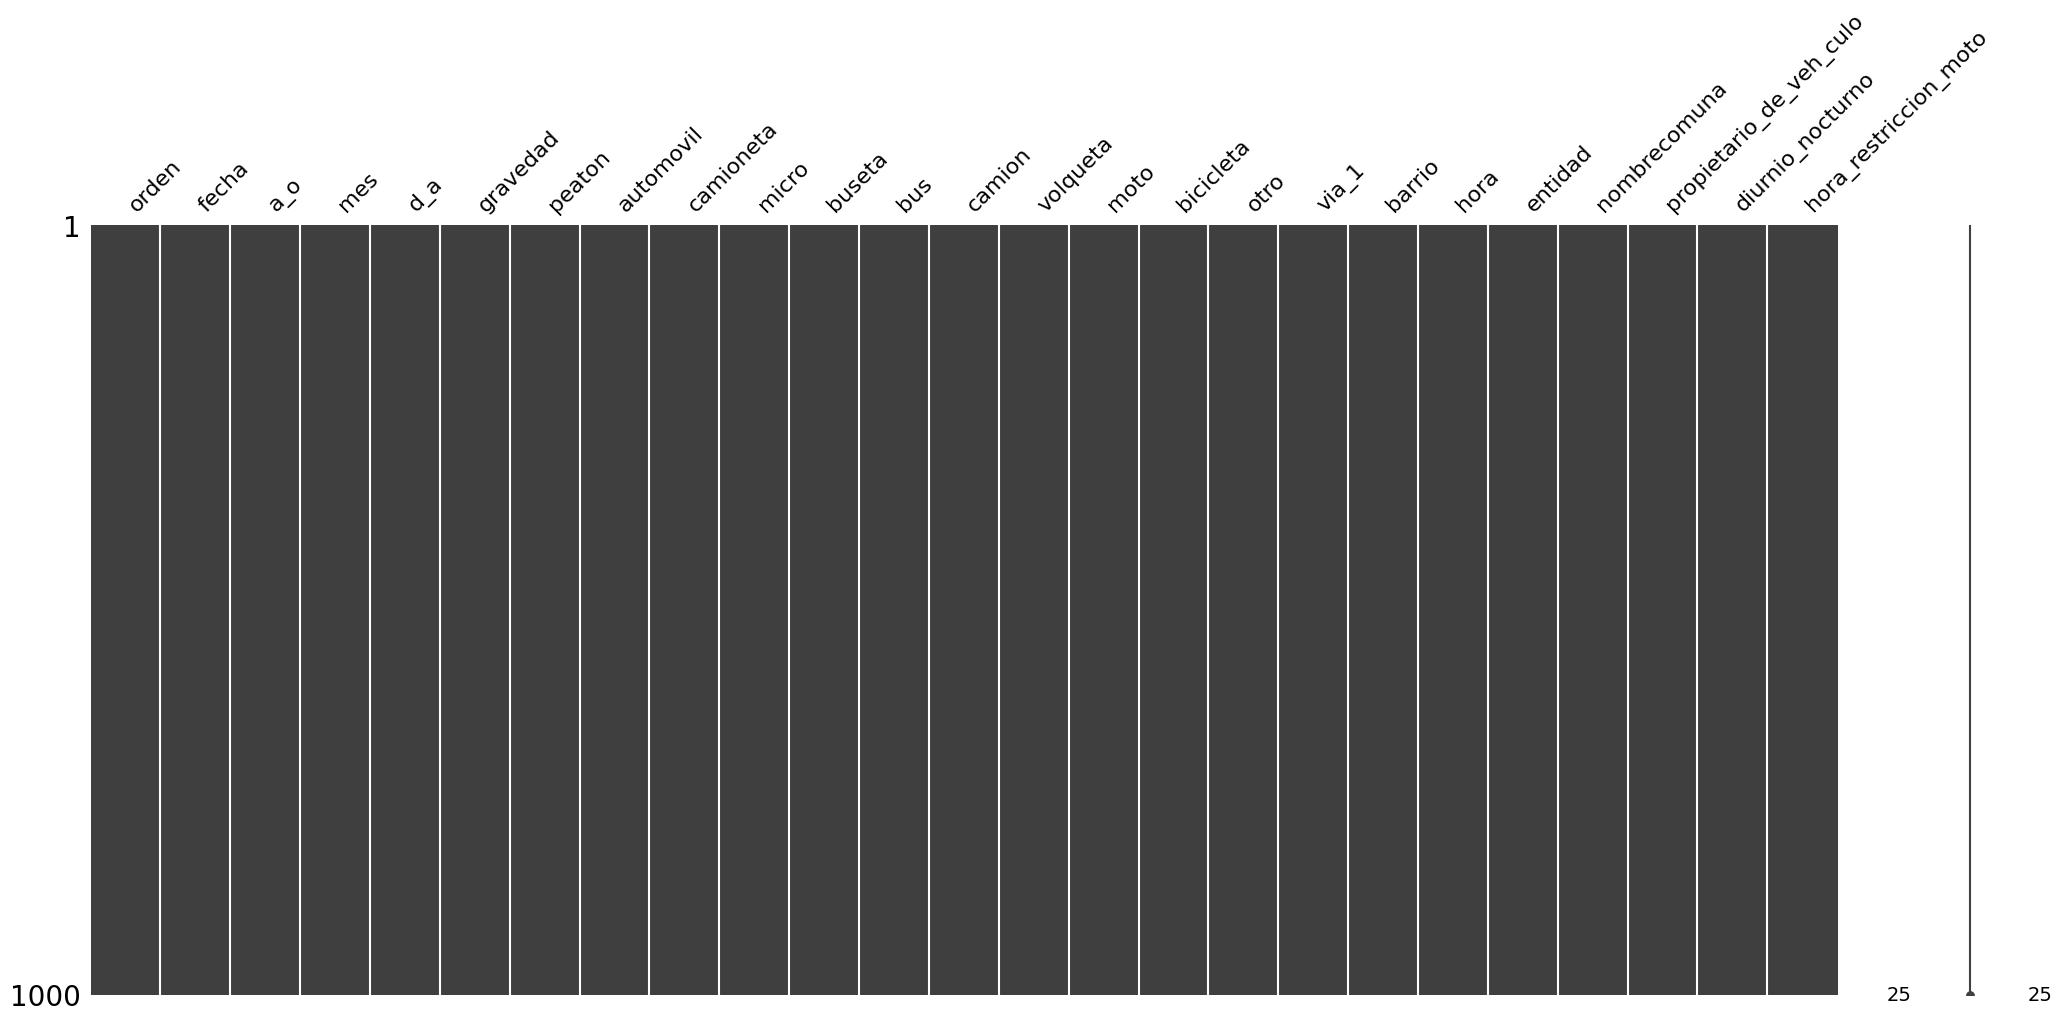

In [ ]:
msno.matrix(df)

#Visualizaciones e Insights

In [ ]:
df.columns

Index(['orden', 'fecha', 'a_o', 'mes', 'd_a', 'gravedad', 'peaton',
       'automovil', 'camioneta', 'micro', 'buseta', 'bus', 'camion',
       'volqueta', 'moto', 'bicicleta', 'otro', 'via_1', 'barrio', 'hora',
       'entidad', 'nombrecomuna', 'propietario_de_veh_culo',
       'diurnio_nocturno', 'hora_restriccion_moto'],
      dtype='object')

In [ ]:
def cant_automoviles(automoviles):
    suma=0
    for automovil in automoviles:
        suma+=int(automovil)

    return suma

In [ ]:
cant_automoviles(df['automovil'].astype(int))

878

In [ ]:
def cant_peatones(peatones):
    suma=0
    for peaton in peatones:
        suma+=int(peaton)

    return suma

In [ ]:
cant_peatones(df['peaton'].astype(int))

96

In [ ]:
def cant_camionetas(camionetas):
    suma=0
    for camioneta in camionetas:
        suma+=int(camioneta)

    return suma

In [ ]:
cant_camionetas(df['camioneta'].astype(int))

165

In [ ]:
def cant_buses(buses):
    suma=0
    for bus in buses:
        suma+=int(bus)

    return suma

In [ ]:
cant_buses(df['bus'].astype(int))

27

In [ ]:
def cant_bicicletas(bicicletas):
    suma=0
    for bicicleta in bicicletas:
        suma+=int(bicicleta)

    return suma

In [ ]:
cant_bicicletas(df['bicicleta'].astype(int))

12

In [ ]:
def cant_motos(motos):
    suma=0
    for moto in motos:
        suma+=(moto)

    return suma

In [ ]:
cant_motos(df['moto'].astype(int))

539

 ## ¿En qué medida se clasifican los accidentes según la magnitud de los daños, lesiones o impacto en la seguridad vial?


In [ ]:
df_group = df.groupby('gravedad').count()['orden']

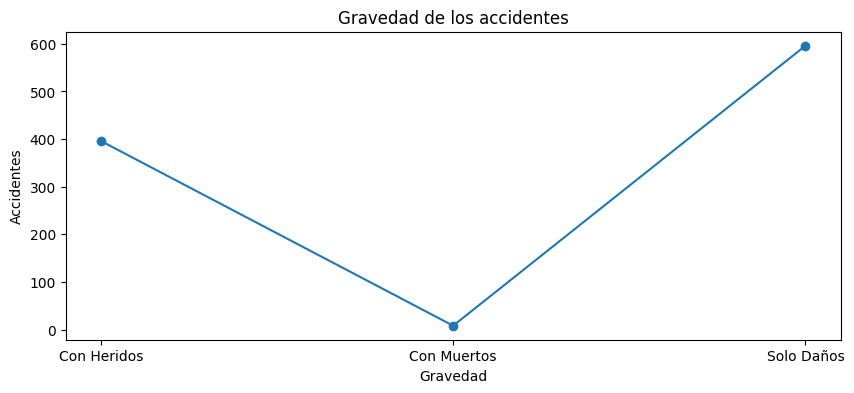

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
x = df_group.index
y = df_group.values
ax.plot(x,y, marker='o')
ax.set_xlabel('Gravedad')
ax.set_ylabel('Accidentes')
ax.set_title('Gravedad de los accidentes')
plt.grid(False)

Los incidentes de accidentalidad muestran una mayor gravedad cuando involucran exclusivamente daños al vehículo en el que se desplazaba el actor vial. Sin embargo, en aproximadamente la mitad de los casos, se reportan heridos, y en una proporción menor, en un porcentaje reducido, los accidentes resultan en muertes.

##¿Cuál es la distribución de la variable día y en cuál día se presenta más accidentalidad?

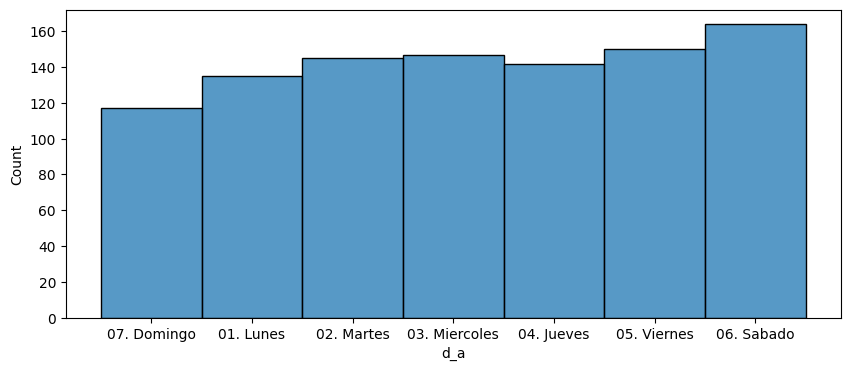

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=df,x='d_a')


Podemos observar que la distribución de los valores revela una mayor incidencia de accidentalidad los días viernes, con mayores casos presentados los sábados en las vías. No obstante, la diferencia entre los días de la semana no es significativa, ya que la distribución de los datos se mantiene bastante equitativa en todos los días, con la excepción del domingo, donde se registra un menor número de accidentes.

##¿Cuál es el día de mayor accidentalidad según el actor víal?



Text(0.5, 0, 'día')

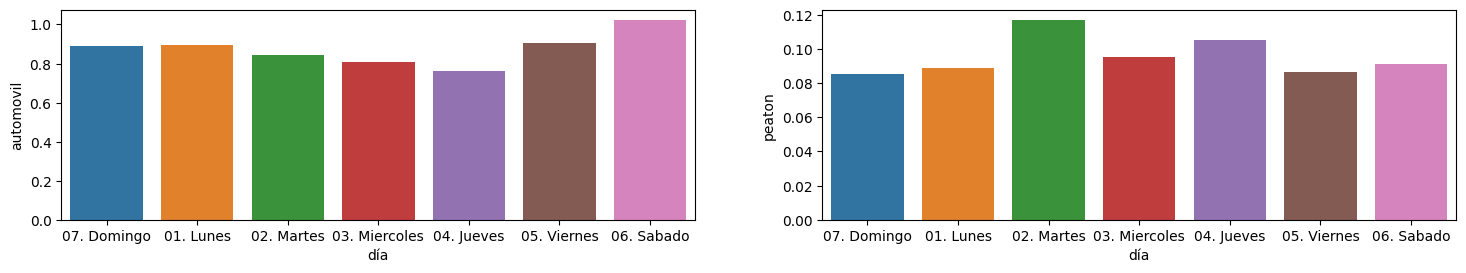

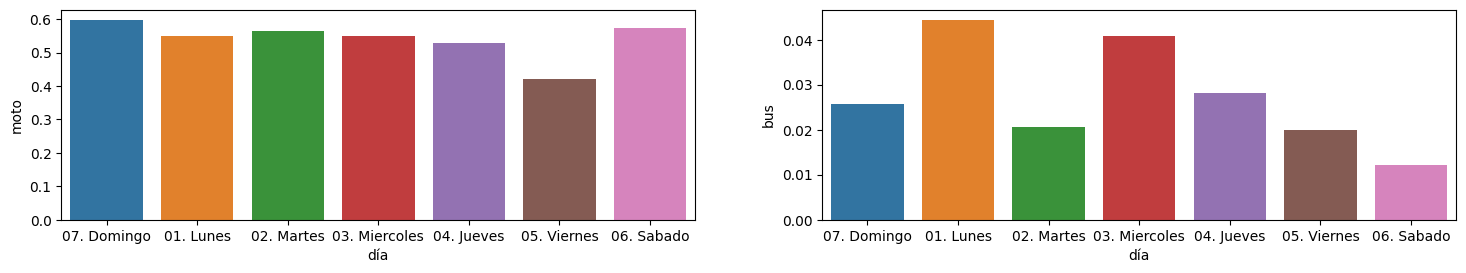

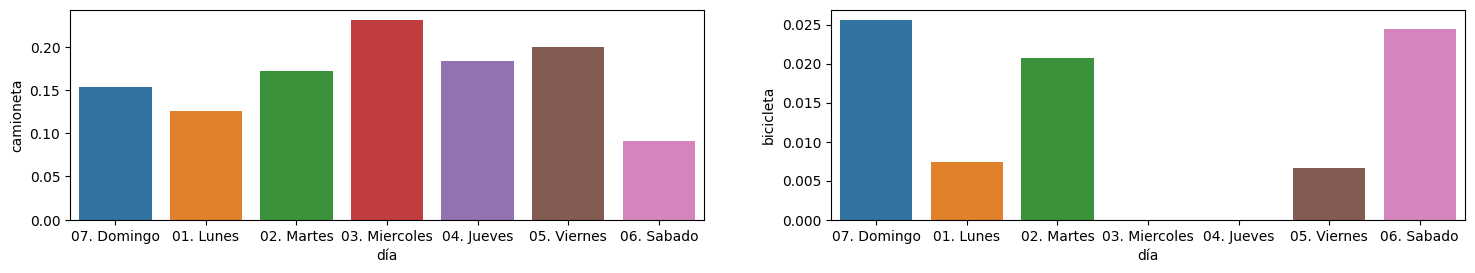

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(221)
sns.barplot(data=df,x="d_a", y="automovil", errorbar=None)
plt.xlabel('día')
plt.subplot(222)
sns.barplot(data=df,x="d_a", y="peaton", errorbar=None)
plt.xlabel('día')
plt.figure(figsize=(18,6))
plt.subplot(221)
sns.barplot(data=df,x="d_a", y="moto", errorbar=None)
plt.xlabel('día')
plt.subplot(222)
sns.barplot(data=df,x="d_a", y="bus", errorbar=None)
plt.xlabel('día')
plt.figure(figsize=(18,6))
plt.subplot(221)
sns.barplot(data=df,x="d_a", y="camioneta", errorbar=None)
plt.xlabel('día')
plt.subplot(222)
sns.barplot(data=df,x="d_a", y="bicicleta", errorbar=None)
plt.xlabel('día')

Observamos que los días en los cuales los automoviles presentan mayor accidentalidad son los días sábados, de esto podemos concluir que los días sabados tenemos más afluencia de automoviles en las vías, por otro lado los días miercoles, tanto las camionetas como los buses presentan casos de accidentalidad altos con respecto a los demás días de la semana.

Las motos presentan valores muy equitativos entre todos los días de la semanas al igual que los peatones, sin embargo el actor víal que representa menores casos de accidentalidad son las bicicletas.

##¿Cuál es la gravedad de los accidentes según el actor víal?

<Axes: xlabel='gravedad', ylabel='bicicleta'>

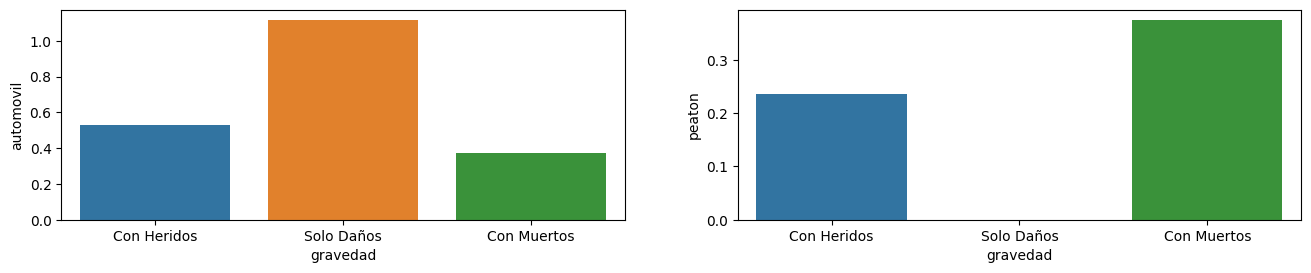

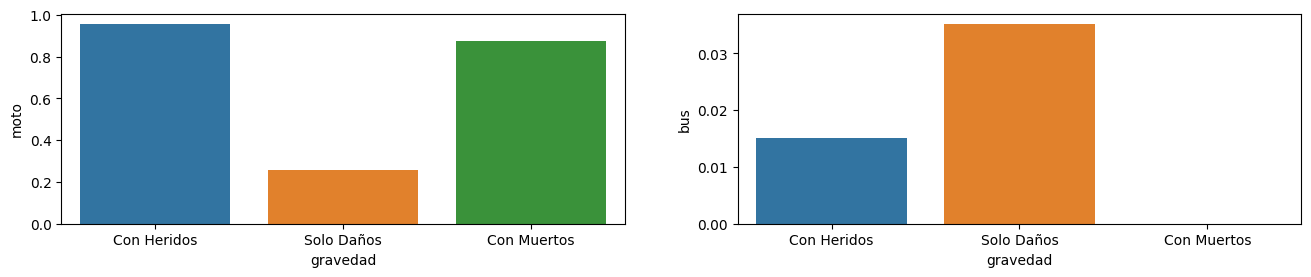

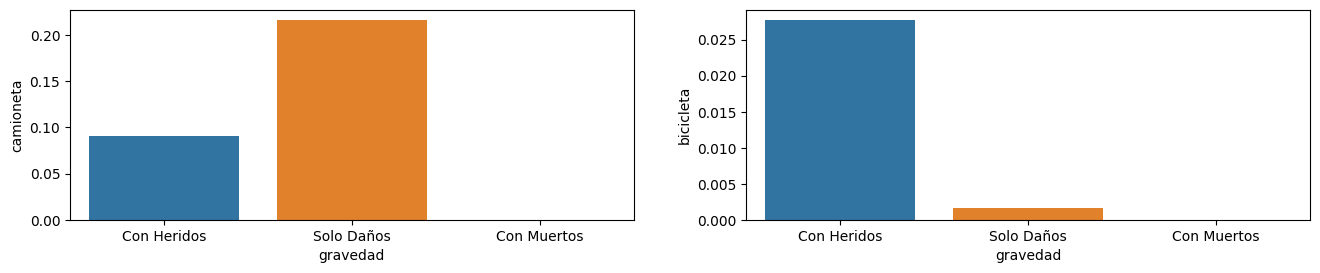

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.barplot(data=df,x="gravedad", y="automovil", errorbar=None)
plt.subplot(222)
sns.barplot(data=df,x="gravedad", y="peaton", errorbar=None)
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.barplot(data=df,x="gravedad", y="moto", errorbar=None)
plt.subplot(222)
sns.barplot(data=df,x="gravedad", y="bus", errorbar=None)
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.barplot(data=df,x="gravedad", y="camioneta", errorbar=None)
plt.subplot(222)
sns.barplot(data=df,x="gravedad", y="bicicleta", errorbar=None)

Tanto los automoviles, como los buses y las camionetas presentan una gravedad de accidentalidad donde unicamente se ven comprometidos daños materiales al automotor, sin embargo tanto los accidentes que involucran motos y peatones, en una gran proporción se presentan heridos y fatalidades.

##¿Cuál es la gravedad de los accidentes según el actor víal y la fecha?

<Axes: xlabel='fecha', ylabel='bicicleta'>

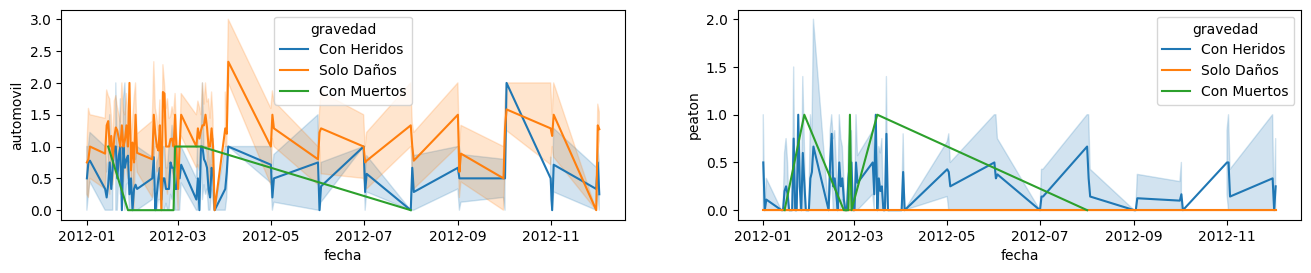

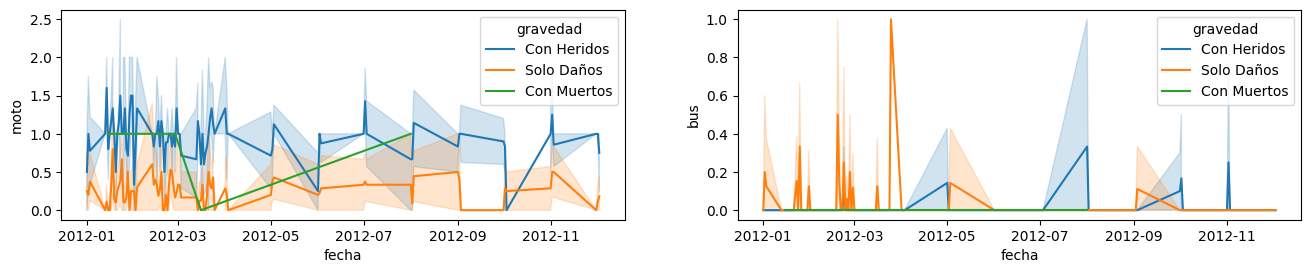

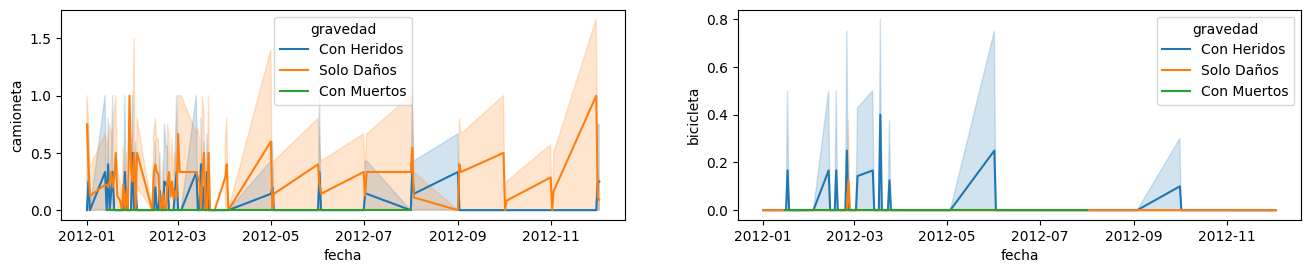

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.lineplot(data=df, x="fecha", y="automovil", hue='gravedad')
plt.subplot(222)
sns.lineplot(data=df, x="fecha", y="peaton", hue='gravedad')
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.lineplot(data=df, x="fecha", y="moto", hue='gravedad')
plt.subplot(222)
sns.lineplot(data=df, x="fecha", y="bus", hue='gravedad')
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.lineplot(data=df, x="fecha", y="camioneta", hue='gravedad')
plt.subplot(222)
sns.lineplot(data=df, x="fecha", y="bicicleta", hue='gravedad')

##¿Cuál es el actor víal que presenta mayor accidentalidad?

In [ ]:
car_types = ['automovil','peaton','camioneta', 'bus', 'moto', 'bicicleta']
data = [878,96,165,27,539,12]

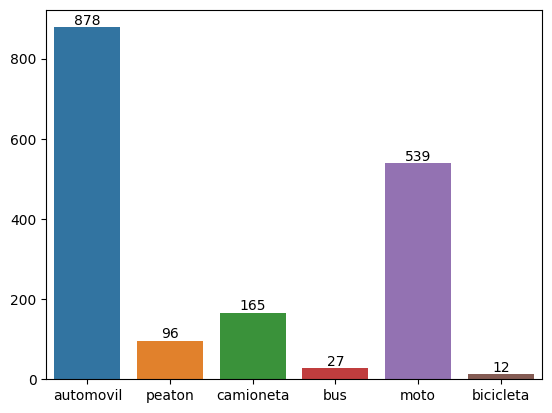

In [ ]:
ax = sns.barplot( x=car_types, y=data, errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

Se observa como la mayoría de los casos de accidentalidad se presentan con automoviles al igual que con las motos, donde los demás actores viales, como los peatos, camionetas, buses y bicicletas presentan casos muy bajos de accidentalidad.

##¿Cuál es la corrrelación entre las variables?

In [ ]:
df2 = df[['orden', 'fecha', 'mes', 'd_a', 'gravedad', 'peaton',
       'automovil', 'camioneta', 'micro', 'buseta', 'bus', 'camion',
       'volqueta', 'moto', 'bicicleta', 'otro', 'via_1', 'barrio', 'hora',
       'entidad', 'nombrecomuna', 'propietario_de_veh_culo',
       'diurnio_nocturno', 'hora_restriccion_moto']]

<ipython-input-187-04bbfa524f2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax =sns.heatmap(df2.corr(), annot = True, cmap = 'crest')


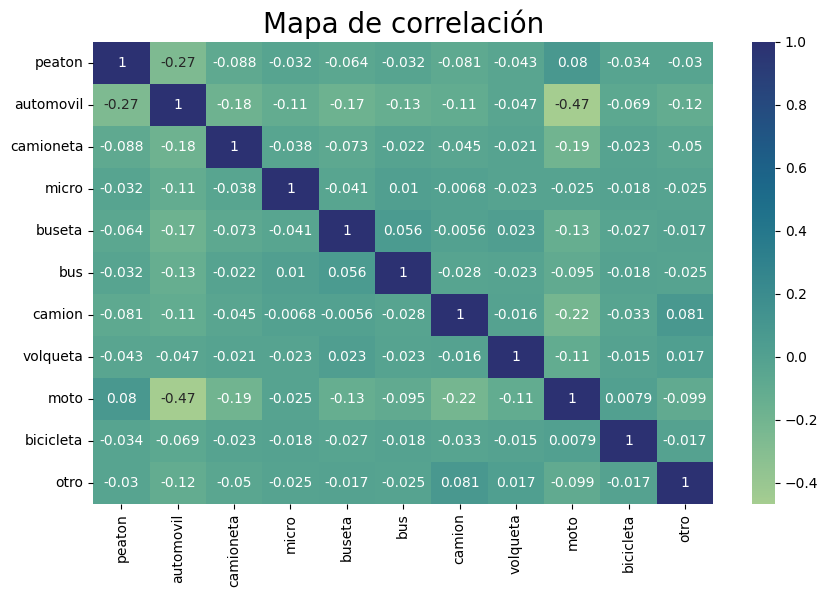

In [ ]:
plt.figure(figsize=(10,6))
ax =sns.heatmap(df2.corr(), annot = True, cmap = 'crest')
plt.title('Mapa de correlación', fontsize = 20)
plt.show()

Se evidencia una baja correlación entre las variables, ya que ninguna muestra valores que representen positivismo con respecto a las demás.